In [28]:
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
training = pd.read_csv('train.csv')

In [3]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182080 entries, 0 to 182079
Data columns (total 16 columns):
id                                              182080 non-null object
teacher_id                                      182080 non-null object
teacher_prefix                                  182076 non-null object
school_state                                    182080 non-null object
project_submitted_datetime                      182080 non-null object
project_grade_category                          182080 non-null object
project_subject_categories                      182080 non-null object
project_subject_subcategories                   182080 non-null object
project_title                                   182080 non-null object
project_essay_1                                 182080 non-null object
project_essay_2                                 182080 non-null object
project_essay_3                                 6374 non-null object
project_essay_4                        

In [4]:
training['project_submitted_datetime'] = pd.to_datetime(training['project_submitted_datetime'])

In [5]:
training['project_is_approved'].value_counts()

1    154346
0     27734
Name: project_is_approved, dtype: int64

In [6]:
training.describe()

,teacher_number_of_previously_posted_projects,project_is_approved
count,182080.000000,182080.000000
mean,11.237055,0.847682
std,28.016086,0.359330
min,0.000000,0.000000
25%,0.000000,1.000000
50%,2.000000,1.000000
75%,9.000000,1.000000
max,451.000000,1.000000


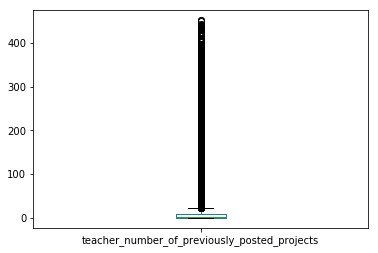

In [7]:
training['teacher_number_of_previously_posted_projects'].plot.box()

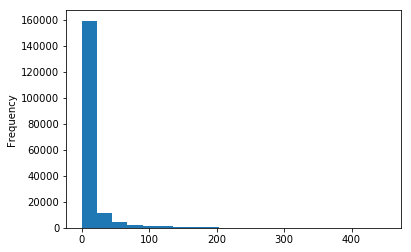

In [8]:
training['teacher_number_of_previously_posted_projects'].plot.hist(bins=20)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


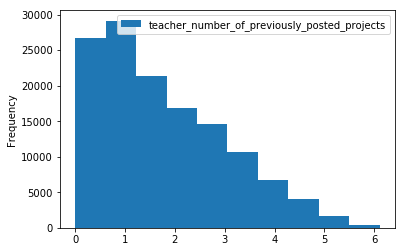

In [9]:
log_project = pd.DataFrame(np.log(training[['teacher_number_of_previously_posted_projects']]))

log_project[log_project['teacher_number_of_previously_posted_projects'] != -float('inf')].plot.hist(bins=10)
plt.show()

In [10]:
training['teacher_number_of_previously_posted_projects'].mean(), training['teacher_number_of_previously_posted_projects'].std()

(11.237055140597539, 28.01608601938684)

In [11]:
11.23 + (28.02 * 2)

67.27

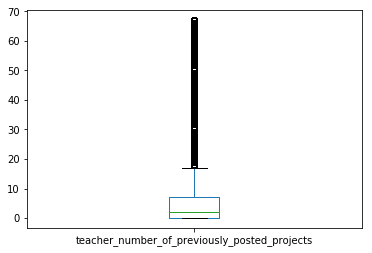

In [12]:
training[training['teacher_number_of_previously_posted_projects'] < 67.27]['teacher_number_of_previously_posted_projects'].plot.box()

In [13]:
training = training[training['teacher_number_of_previously_posted_projects'] < 67.27]

In [14]:
training['teacher_number_of_previously_posted_projects'].describe()

count    175379.000000
mean          6.835625
std          11.533715
min           0.000000
25%           0.000000
50%           2.000000
75%           7.000000
max          67.000000
Name: teacher_number_of_previously_posted_projects, dtype: float64

In [26]:
training['school_state'].value_counts()[0:21]

CA    24048
TX    12143
NY    10960
FL    10179
NC     7910
IL     7086
GA     6511
SC     6302
MI     5223
PA     4777
MO     4159
IN     4122
OH     3989
MA     3989
LA     3935
OK     3777
WA     3761
NJ     3589
AZ     3562
VA     3405
AL     2879
Name: school_state, dtype: int64

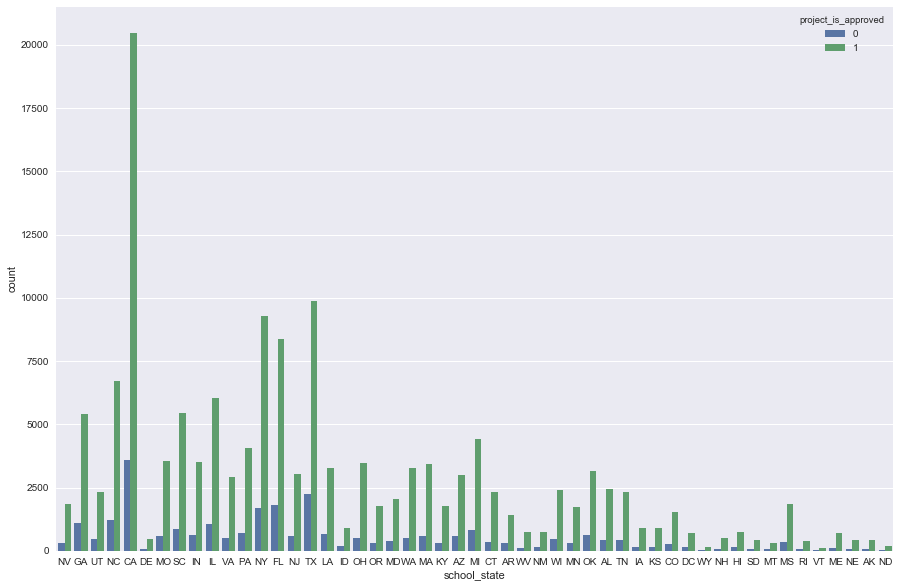

In [54]:
plt.figure(figsize=(15,10))
sns.countplot(x='school_state', hue='project_is_approved', data=training)
plt.show()

In [31]:
training['teacher_prefix'].value_counts()

Mrs.       92153
Ms.        62537
Mr.        16794
Teacher     3865
Dr.           26
Name: teacher_prefix, dtype: int64

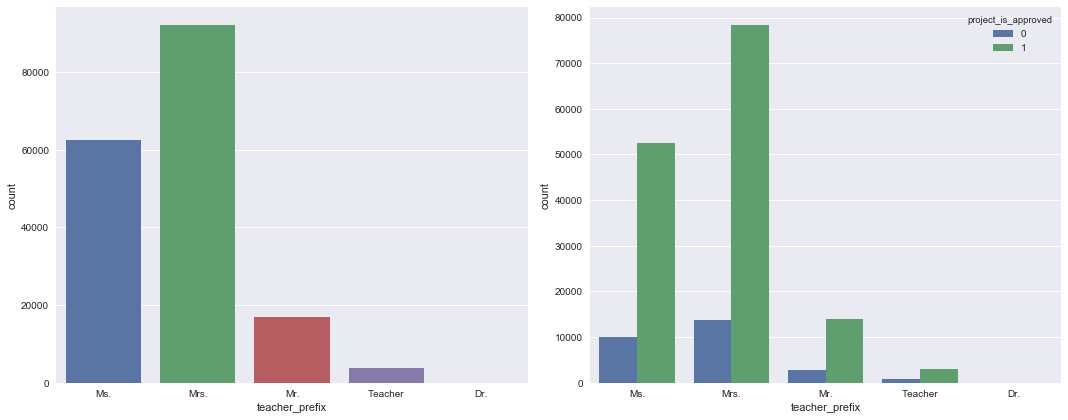

In [58]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(x='teacher_prefix', data=training)

plt.subplot(1,2,2)
sns.countplot(x='teacher_prefix', hue='project_is_approved', data=training)

plt.tight_layout()
plt.show()

In [32]:
training['project_grade_category'].value_counts()

Grades PreK-2    70905
Grades 3-5       59626
Grades 6-8       27117
Grades 9-12      17731
Name: project_grade_category, dtype: int64

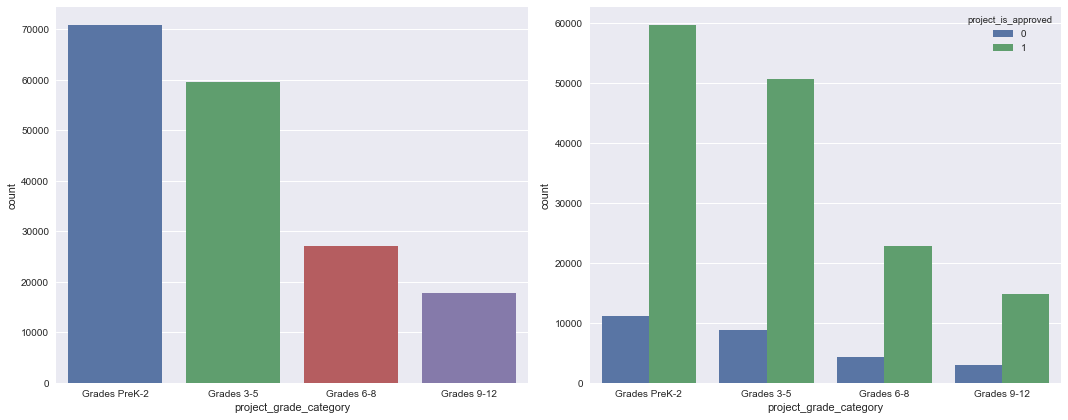

In [59]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(x='project_grade_category', data=training)

plt.subplot(1,2,2)
sns.countplot(x='project_grade_category', hue='project_is_approved', data=training)

plt.tight_layout()
plt.show()

In [33]:
training['project_subject_categories'].value_counts()

Literacy & Language                           38332
Math & Science                                27518
Literacy & Language, Math & Science           24003
Health & Sports                               15935
Music & The Arts                               8197
Special Needs                                  6919
Literacy & Language, Special Needs             6456
Applied Learning                               6118
Math & Science, Literacy & Language            3664
Applied Learning, Literacy & Language          3602
History & Civics                               2960
Math & Science, Special Needs                  2911
Literacy & Language, Music & The Arts          2671
Math & Science, Music & The Arts               2481
Applied Learning, Special Needs                2412
Health & Sports, Special Needs                 2297
History & Civics, Literacy & Language          2214
Math & Science, Applied Learning               1958
Warmth, Care & Hunger                          1889
Applied Lear

In [34]:
training['project_subject_categories'].unique()

array(['Literacy & Language', 'Music & The Arts, Health & Sports',
       'Math & Science, Literacy & Language', 'Health & Sports',
       'Applied Learning, Literacy & Language', 'Math & Science',
       'Literacy & Language, Math & Science', 'Special Needs',
       'Applied Learning, Special Needs',
       'Applied Learning, Music & The Arts',
       'Math & Science, Special Needs', 'Health & Sports, Special Needs',
       'Literacy & Language, History & Civics',
       'Health & Sports, Literacy & Language', 'Music & The Arts',
       'Literacy & Language, Special Needs',
       'Special Needs, Music & The Arts', 'History & Civics',
       'Math & Science, Applied Learning',
       'Literacy & Language, Music & The Arts',
       'Math & Science, Music & The Arts',
       'History & Civics, Special Needs',
       'History & Civics, Literacy & Language', 'Applied Learning',
       'Math & Science, History & Civics',
       'Applied Learning, Math & Science',
       'Health & Sports, A

In [35]:
len(training['project_subject_categories'].unique())

51

In [36]:
training['project_subject_subcategories'].value_counts()

Literacy                                        15459
Literacy, Mathematics                           13613
Literature & Writing, Mathematics                9749
Literacy, Literature & Writing                   9008
Mathematics                                      8872
Literature & Writing                             7276
Special Needs                                    6919
Health & Wellness                                5646
Applied Sciences, Mathematics                    5444
Literacy, Special Needs                          3939
Applied Sciences                                 3932
Gym & Fitness, Health & Wellness                 3575
Visual Arts                                      3540
ESL, Literacy                                    3534
Music                                            2359
Literature & Writing, Special Needs              2178
Health & Wellness, Special Needs                 1988
Mathematics, Special Needs                       1897
Warmth, Care & Hunger       

In [37]:
training['project_subject_categories'] = training['project_subject_categories'].str.replace('Warmth, Care & Hunger', 'Warmth Care & Hunger')

In [38]:
training['project_subject_subcategories'] = training['project_subject_subcategories'].str.replace('Warmth, Care & Hunger', 'Warmth Care & Hunger')

In [39]:
training['project_subject_subcategories'].value_counts()

Literacy                                        15459
Literacy, Mathematics                           13613
Literature & Writing, Mathematics                9749
Literacy, Literature & Writing                   9008
Mathematics                                      8872
Literature & Writing                             7276
Special Needs                                    6919
Health & Wellness                                5646
Applied Sciences, Mathematics                    5444
Literacy, Special Needs                          3939
Applied Sciences                                 3932
Gym & Fitness, Health & Wellness                 3575
Visual Arts                                      3540
ESL, Literacy                                    3534
Music                                            2359
Literature & Writing, Special Needs              2178
Health & Wellness, Special Needs                 1988
Mathematics, Special Needs                       1897
Warmth Care & Hunger        

In [40]:
training['project_subject_categories'] = list(training['project_subject_categories'].str.split(r', '))

In [41]:
training['project_subject_categories'][3]

['Health & Sports']

In [42]:
training1 = training['project_subject_categories'].apply(collections.Counter)
training1 = pd.DataFrame.from_records(training1).fillna(value=0)

In [43]:
training['project_subject_subcategories'] = list(training['project_subject_subcategories'].str.split(r', '))

In [44]:
training['project_subject_subcategories'][2]

['Applied Sciences', 'Literature & Writing']

In [45]:
training2 = training['project_subject_subcategories'].apply(collections.Counter)
training2 = pd.DataFrame.from_records(training2).fillna(value=0)

In [46]:
training = training.merge(training1, how='left', left_index=True, right_index=True)

In [47]:
training = training.merge(training2, how='left', left_index=True, right_index=True)

In [48]:
training.drop(['project_subject_subcategories', 'project_subject_categories'], 1, inplace=True)

In [49]:
training.head()

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,...,Music,Nutrition Education,Other,Parent Involvement,Performing Arts,Social Sciences,Special Needs_y,Team Sports,Visual Arts,Warmth Care & Hunger_y
0,p036502,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,2016-11-18 14:45:59,Grades PreK-2,Super Sight Word Centers,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,Keep Calm and Dance On,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,p233823,a9b876a9252e08a55e3d894150f75ba3,Ms.,UT,2017-01-01 22:57:44,Grades 3-5,Lets 3Doodle to Learn,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,We are looking to add some 3Doodler to our cla...,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,p185307,525fdbb6ec7f538a48beebaa0a51b24f,Mr.,NC,2016-08-12 15:42:11,Grades 3-5,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,"The student's project which is totally \""kid-i...",NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,p013780,a63b5547a7239eae4c1872670848e61a,Mr.,CA,2016-08-06 09:09:11,Grades 6-8,We need clean water for our culinary arts class!,My students are athletes and students who are ...,For some reason in our kitchen the water comes...,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


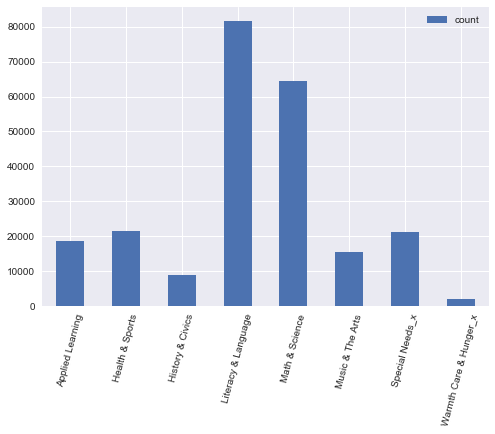

In [66]:
pd.DataFrame(training[['Applied Learning','Health & Sports','History & Civics','Literacy & Language','Math & Science','Music & The Arts','Special Needs_x','Warmth Care & Hunger_x']].sum(axis=0), columns=['count']).plot.bar()
plt.xticks(rotation=75)
plt.show()

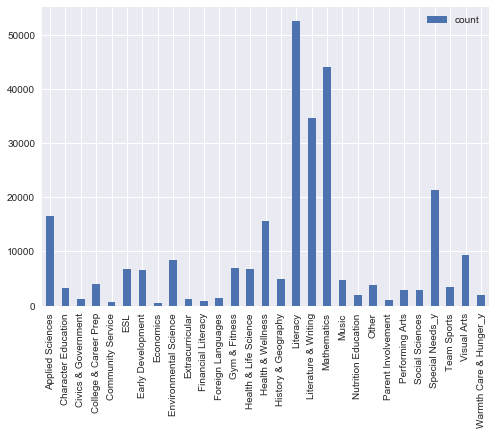

In [69]:
plt.figure(figsize=(20,7))
pd.DataFrame(training.loc[:,'Applied Sciences':].sum(axis=0), columns=['count']).plot.bar()
plt.show()